In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def solve_laplace(init_psi, alpha, N_iter):
  # Author: Charlie Ardern, Date: 28/01/2025
  # This function solves the Laplace’s equation using the over−relaxation method
  # Input:
  #  init_psi: 2D matrix containing the initial \psi, including boundaries.
  #  alpha: the coefficient of over−relaxation.
  #  N_iter: maximum number of iterations performed.
  # Output:
  #  psi: 2D matrix of the value of \psi after (up to) N_iter iterations.
  #  hist_values: (N_iter x 3) matrix that contains historical values of 3 points during the iteration (1 in the upper half, 1 in the middle, and 1 in the lower half).
  # Constraints:
  #  The boundaries of \psi are kept constant during the iterations.
  psi = init_psi.copy()
  dim = len(init_psi)
  hist_values = np.zeros([N_iter, 3])
  for i in range(N_iter):
    for y in range(dim-2):
      for x in range(dim-2):
        psi[dim-2-y,dim-2-x] = psi[dim-2-y,dim-2-x] + 0.25*alpha*(psi[dim-2-y+1,dim-2-x]+psi[dim-2-y-1,dim-2-x]+psi[dim-2-y,dim-2-x+1]+psi[dim-2-y,dim-2-x-1]-4*psi[dim-2-y,dim-2-x])
        # Checks if the point is one we are tracking
        if x==0 and y==0:
          hist_values[i, 0] = psi[dim-2-y,dim-2-x]
        elif x==2 and y==2:
          hist_values[i, 1] = psi[dim-2-y,dim-2-x]
        elif x==4 and y==4:
          hist_values[i, 2] = psi[dim-2-y,dim-2-x]
          # Checks for convergence, if reached it fills rest of list with current value. This check is done at x=4,y=4 so hist_values has already been calculated for the other two points (meaning rest of list doesn't contain zeroes)
          if i > 1 and np.abs(hist_values[i,2]-hist_values[i-1,2]) <= 0.00001:
            hist_values[i:, 0] = hist_values[i, 0]
            hist_values[i:, 1] = hist_values[i, 1]
            hist_values[i:, 2] = hist_values[i, 2]
            print(f"Stopped after {i} iterations")
            return psi, hist_values
  return psi, hist_values

## Boundary Conditions:
$$\psi(x,y) = \begin{cases}
0 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\text{ for } x=0, 0\le y\le 1\\
0 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\text{ for } y=0, 0\le x\le 1\\
\sin 1\sinh y \;\;\; \text{ for } x=1, 0\le y\le 1\\
\sin x \sinh 1 \;\;\; \text{ for } y=1, 0\le x\le 1\\
\end{cases}$$

In [21]:
N_iter = 30

# Generate analytic psi values
analytic_psi = np.zeros([7,7])
for i in range(7):
  analytic_psi[i] = np.sinh(i/6)*np.sin(np.linspace(0,1,num=7))

# Set up input for numerical psi solver
init_psi = np.random.rand(7,7)
sinh = np.sinh(np.linspace(0,1,num=7))*np.sin(1)
sin = np.sin(np.linspace(0,1,num=7))*np.sinh(1)
init_psi[:,0] = 0
init_psi[0,:] = 0
init_psi[:,6] = sinh
init_psi[6,:] = sin
hist_values = np.zeros([5, N_iter, 3])
psi = np.zeros([5,7,7])

# Generate numerical psi values
psi[0], hist_values[0] = solve_laplace(init_psi, 1.1, 30)
psi[1], hist_values[1] = solve_laplace(init_psi, 1.25, 30)
psi[2], hist_values[2] = solve_laplace(init_psi, 1.35, 30)
psi[3], hist_values[3] = solve_laplace(init_psi, 1.45, 30)
psi[4], hist_values[4] = solve_laplace(init_psi, 2.10, 30)

print(f"MSE: {np.mean((psi[2]-analytic_psi)**2)}")

Stopped after 22 iterations
Stopped after 15 iterations
Stopped after 9 iterations
Stopped after 13 iterations
MSE: 5.0721274171337e-08


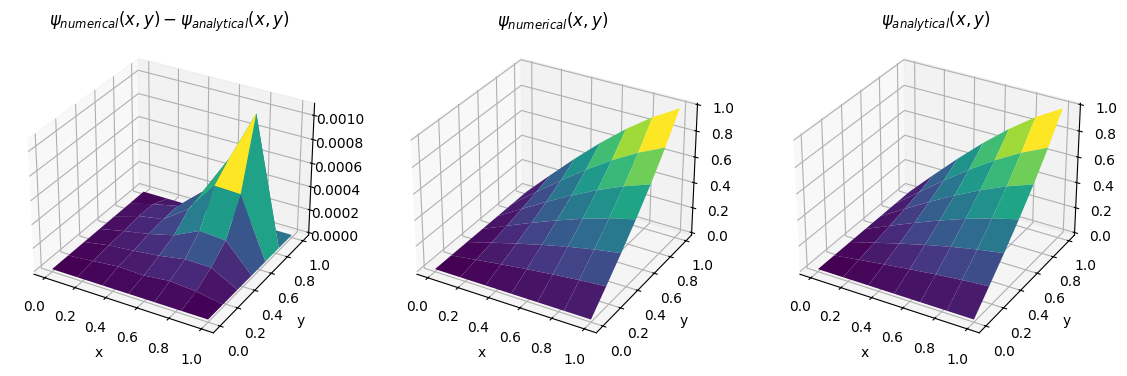

In [22]:
# == Creating 3D Plots ==
from mpl_toolkits.mplot3d import Axes3D

# Create x and y values corresponding to the z grid
x = np.linspace(0,1,num=7)  # x values (columns)
y = np.linspace(0,1,num=7)  # y values (rows)
x, y = np.meshgrid(x, y)  # Create a meshgrid

# Create a 3D plot
fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

# Plot the surface
ax3.plot_surface(x, y, analytic_psi, cmap='viridis')
ax2.plot_surface(x, y, psi[2], cmap='viridis')
ax1.plot_surface(x, y, psi[2]-analytic_psi, cmap='viridis')

# Add labels
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title(r'$\psi_{numerical}(x,y)-\psi_{analytical}(x,y)$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title(r'$\psi_{numerical}(x,y)$')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title(r'$\psi_{analytical}(x,y)$')

# Show the plot
plt.show()
fig.savefig("3D-plots.png",dpi=300)  # Save as PNG

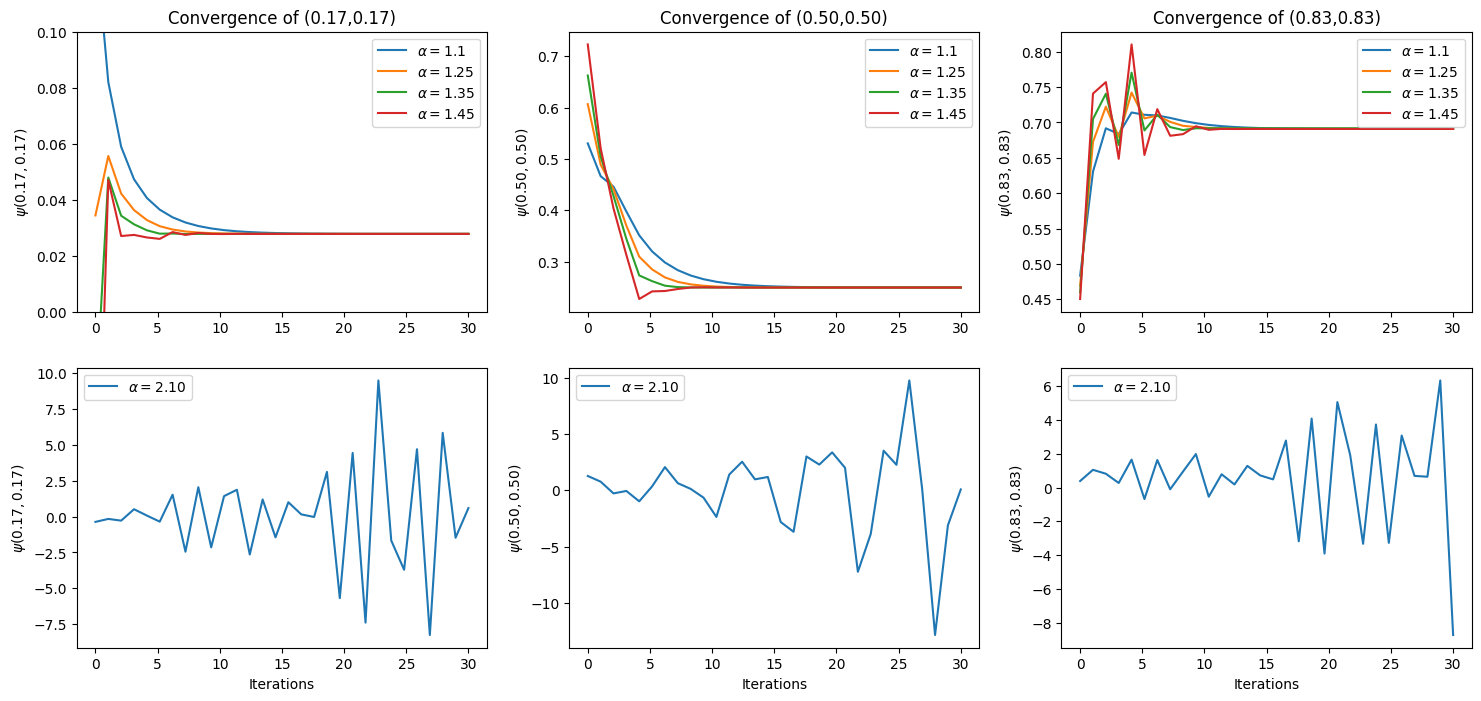

In [23]:
# == Creating Convergence Plots ==
fig, axs = plt.subplots(2, 3, figsize=(18, 8)) # Creating figure
axs[0,0].set_title("Convergence of (0.17,0.17)")
axs[0,1].set_title("Convergence of (0.50,0.50)")
axs[0,2].set_title("Convergence of (0.83,0.83)")

for ax in axs[1,:]: ax.set_xlabel("Iterations")
for ax in axs[:,0]: ax.set_ylabel(r'$\psi(0.17,0.17)$')
for ax in axs[:,1]: ax.set_ylabel(r'$\psi(0.50,0.50)$')
for ax in axs[:,2]: ax.set_ylabel(r'$\psi(0.83,0.83)$')

for i in range(3):
  axs[0,i].plot(np.linspace(0,N_iter,num=N_iter), hist_values[0,:,2-i], label=r'$\alpha=1.1$')
  axs[0,i].plot(np.linspace(0,N_iter,num=N_iter), hist_values[1,:,2-i], label=r'$\alpha=1.25$')
  axs[0,i].plot(np.linspace(0,N_iter,num=N_iter), hist_values[2,:,2-i], label=r'$\alpha=1.35$')
  axs[0,i].plot(np.linspace(0,N_iter,num=N_iter), hist_values[3,:,2-i], label=r'$\alpha=1.45$')
  axs[1,i].plot(np.linspace(0,N_iter,num=N_iter), hist_values[4,:,2-i], label=r'$\alpha=2.10$')
  axs[0,i].legend()
  axs[1,i].legend()

axs[0,0].set_ylim(0.0,0.100)
fig.savefig("convergence-plots.png",dpi=300)  # Save as PNG

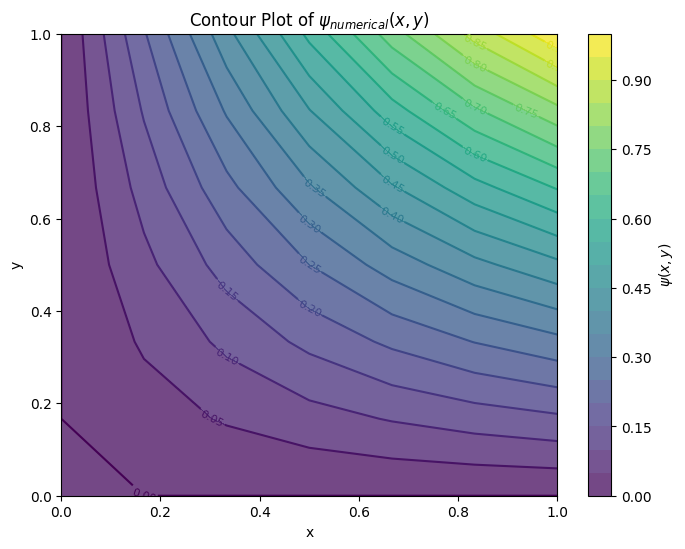

In [24]:
# == Creating Contour Plot ==

# Generate example data
x = np.linspace(0, 1, 7)  # Create an array for x
y = np.linspace(0, 1, 7)  # Create an array for y
x, y = np.meshgrid(x, y)     # Create a grid of x, y values

# Create the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contour(x, y, psi[2], levels=20, cmap='viridis')  # Contour lines
plt.clabel(contour, inline=True, fontsize=8)  # Add labels to contour lines

# Add a filled contour plot
plt.contourf(x, y, psi[2], levels=20, cmap='viridis', alpha=0.75)  # Filled contours

plt.colorbar(label=r'$\psi(x,y)$')  # Add a color bar to represent z values
plt.title(r'Contour Plot of $\psi_{numerical}(x,y)$')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("contour-plot.png",dpi=300)  # Save as PNG
plt.show()